<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2D13_Sentiment_Classifier_with_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2D13: Sentiment Classifier with Bag-of-Words

Goal
- Classify movie reviews as positive or negative using BoW vectors and a feedforward network.

- a simple sentiment analysis model using the Bag-of-Words (BoW) approach on text data.
- It converts sentences into fixed-size vectors and trains a classifier to predict positive or negative sentiment.

In [12]:
import torch
import torch.nn as nn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [40]:
texts = [
    "This movie was absolutely brilliant!",
    "An amazing cinematic achievement.",
    "I thoroughly enjoyed every minute.",
    "A truly unforgettable film.",
    "Highly recommend this one!",
    "Pure cinematic gold.",
    "What a masterpiece!",
    "My new favorite movie.",
    "Simply outstanding.",
    "This film exceeded all expectations.",
    "Couldn't have asked for a better movie.",
    "So glad I saw this!",
    "A fantastic viewing experience.",
    "The acting was superb.",
    "The story was captivating.",
    "Visually stunning.",
    "I'll be watching this again.",
    "Made me laugh and cry.",
    "A perfect ten!",
    "Truly moved by this film.",
    "What a ride!",
    "Every scene was perfect.",
    "Genuinely impressed.",
    "A must-see.",
    "Incredible direction.",
    "This movie was a total letdown.",
    "I regret watching this film.",
    "What a waste of time.",
    "This film was an absolute disaster.",
    "Couldn't stand this movie.",
    "Truly awful.",
    "Boring beyond belief.",
    "I wanted to walk out.",
    "So disappointing.",
    "This film was a snoozefest.",
    "Absolutely terrible acting.",
    "The plot made no sense.",
    "Visually unappealing.",
    "Never again.",
    "What a mess.",
    "A colossal failure.",
    "This movie was painful to watch.",
    "Seriously bad.",
    "Don't waste your money.",
    "Left me feeling empty.",
    "A complete flop.",
    "Insulting to the audience.",
    "I'd rather watch paint dry.",
    "Utterly forgettable.",
    "Zero stars.",
    "Pretty good movie.",
    "I enjoyed this film.",
    "Not bad at all.",
    "A solid watch.",
    "Decent film.",
    "Had some good moments.",
    "Worth a watch.",
    "I liked it more than I expected.",
    "Fairly enjoyable.",
    "It was okay.",
    "Not the best, but not the worst.",
    "Could have been better.",
    "It was just alright.",
    "A bit disappointing.",
    "I didn't really care for it.",
    "Kind of dull.",
    "Pretty mediocre.",
    "Wouldn't recommend it.",
    "It dragged on a bit.",
    "Nothing special.",
    "Positively riveting!",
    "A triumph of storytelling.",
    "I was on the edge of my seat.",
    "This film spoke to me.",
    "Truly captivating and engaging.",
    "Masterfully crafted.",
    "Bursting with creativity.",
    "An absolute pleasure.",
    "Will stick with me for a long time.",
    "A powerful and moving experience.",
    "Utterly boring.",
    "A complete and utter disaster.",
    "I found it incredibly dull.",
    "My patience was tested.",
    "Painfully slow.",
    "A chore to watch.",
    "Nothing redeemed this film.",
    "I felt nothing while watching this.",
    "A truly forgettable experience.",
    "This film had no redeeming qualities.",
    "Bravo!",
    "Simply divine.",
    "Left me speechless (in a good way).",
    "A shining example of cinema.",
    "I was gripped from start to finish.",
    "Absolutely horrendous.",
    "A cinematic travesty.",
    "It was a struggle to finish.",
    "Truly awful in every sense.",
    "This film should be avoided at all costs."
]

labels = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 0, 0, 0, 0, 0
]
# 1 = positive, 0 = negative

In [41]:
# # Sample dataset (positive/negative reviews)
# texts = [
#     "I loved this movie", "This film was fantastic", "What a great experience",
#     "I hated this movie", "This film was terrible", "What a boring experience"
# ]
# labels = [1, 1, 1, 0, 0, 0]  # 1 = positive, 0 = negative

In [42]:
# convert text to bag-of-words vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts) # Convert to matrix
y = torch.tensor(labels).float().unsqueeze(1)  # Convert labels to tensor

# Convert the sparse matrix X to a dense NumPy array before converting to a tensor
X = torch.tensor(X.toarray()).float()  # Convert BoW vectors to float tensor

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [44]:
class BoWClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BoWClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))


In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cpu


In [46]:
model = BoWClassifier(input_dim=X.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
from tqdm import tqdm

In [48]:
tqdm

tqdm.std.tqdm

In [49]:
for epoch in range(100):
    model.train()
    rloss = 0.0
    for x,y, in tqdm(zip(X_train, y_train), total=len(X_train)):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        loss = criterion(p, y)
        loss.backward()
        optimizer.step()
        rloss += loss.item()
    print(f"epoch: {epoch}, loss: {rloss/len(X_train)}")

100%|██████████| 80/80 [00:00<00:00, 1318.03it/s]


epoch: 0, loss: 0.6907853923738003


100%|██████████| 80/80 [00:00<00:00, 1333.65it/s]


epoch: 1, loss: 0.6819029703736306


100%|██████████| 80/80 [00:00<00:00, 1456.47it/s]


epoch: 2, loss: 0.6724893756210804


100%|██████████| 80/80 [00:00<00:00, 1355.81it/s]


epoch: 3, loss: 0.6629602164030075


100%|██████████| 80/80 [00:00<00:00, 1439.90it/s]


epoch: 4, loss: 0.6534859068691731


100%|██████████| 80/80 [00:00<00:00, 1435.04it/s]


epoch: 5, loss: 0.6441256698220968


100%|██████████| 80/80 [00:00<00:00, 1382.09it/s]


epoch: 6, loss: 0.6349048834294081


100%|██████████| 80/80 [00:00<00:00, 1119.07it/s]


epoch: 7, loss: 0.6258350998163223


100%|██████████| 80/80 [00:00<00:00, 1372.00it/s]


epoch: 8, loss: 0.6169213134795427


100%|██████████| 80/80 [00:00<00:00, 1386.76it/s]


epoch: 9, loss: 0.60816499479115


100%|██████████| 80/80 [00:00<00:00, 1366.77it/s]


epoch: 10, loss: 0.599565626680851


100%|██████████| 80/80 [00:00<00:00, 1247.70it/s]


epoch: 11, loss: 0.5911215424537659


100%|██████████| 80/80 [00:00<00:00, 1399.45it/s]


epoch: 12, loss: 0.5828303266316652


100%|██████████| 80/80 [00:00<00:00, 1406.68it/s]


epoch: 13, loss: 0.5746891777962446


100%|██████████| 80/80 [00:00<00:00, 1456.03it/s]


epoch: 14, loss: 0.5666949845850467


100%|██████████| 80/80 [00:00<00:00, 1334.19it/s]


epoch: 15, loss: 0.5588445462286472


100%|██████████| 80/80 [00:00<00:00, 1377.59it/s]


epoch: 16, loss: 0.5511345639824867


100%|██████████| 80/80 [00:00<00:00, 1367.40it/s]


epoch: 17, loss: 0.5435617532581091


100%|██████████| 80/80 [00:00<00:00, 1420.52it/s]


epoch: 18, loss: 0.5361228305846453


100%|██████████| 80/80 [00:00<00:00, 1380.89it/s]


epoch: 19, loss: 0.5288145445287228


100%|██████████| 80/80 [00:00<00:00, 1383.32it/s]


epoch: 20, loss: 0.5216337293386459


100%|██████████| 80/80 [00:00<00:00, 1362.93it/s]


epoch: 21, loss: 0.5145772762596608


100%|██████████| 80/80 [00:00<00:00, 1344.94it/s]


epoch: 22, loss: 0.5076421577483415


100%|██████████| 80/80 [00:00<00:00, 1128.79it/s]


epoch: 23, loss: 0.5008254107087851


100%|██████████| 80/80 [00:00<00:00, 1283.34it/s]


epoch: 24, loss: 0.49412418752908704


100%|██████████| 80/80 [00:00<00:00, 1337.83it/s]


epoch: 25, loss: 0.48753570280969144


100%|██████████| 80/80 [00:00<00:00, 1419.43it/s]


epoch: 26, loss: 0.4810572326183319


100%|██████████| 80/80 [00:00<00:00, 1287.09it/s]


epoch: 27, loss: 0.47468621395528315


100%|██████████| 80/80 [00:00<00:00, 1395.51it/s]


epoch: 28, loss: 0.4684200782328844


100%|██████████| 80/80 [00:00<00:00, 1399.37it/s]


epoch: 29, loss: 0.4622563999146223


100%|██████████| 80/80 [00:00<00:00, 1341.81it/s]


epoch: 30, loss: 0.4561927950009704


100%|██████████| 80/80 [00:00<00:00, 1360.21it/s]


epoch: 31, loss: 0.45022696200758217


100%|██████████| 80/80 [00:00<00:00, 1411.95it/s]


epoch: 32, loss: 0.4443566804751754


100%|██████████| 80/80 [00:00<00:00, 1382.08it/s]


epoch: 33, loss: 0.43857980631291865


100%|██████████| 80/80 [00:00<00:00, 1319.32it/s]


epoch: 34, loss: 0.43289428390562534


100%|██████████| 80/80 [00:00<00:00, 1380.74it/s]


epoch: 35, loss: 0.4272980423644185


100%|██████████| 80/80 [00:00<00:00, 1438.86it/s]


epoch: 36, loss: 0.42178920190781355


100%|██████████| 80/80 [00:00<00:00, 1426.77it/s]


epoch: 37, loss: 0.4163658270612359


100%|██████████| 80/80 [00:00<00:00, 1355.23it/s]


epoch: 38, loss: 0.41102611236274245


100%|██████████| 80/80 [00:00<00:00, 1354.85it/s]


epoch: 39, loss: 0.4057682953774929


100%|██████████| 80/80 [00:00<00:00, 1091.18it/s]


epoch: 40, loss: 0.4005906643345952


100%|██████████| 80/80 [00:00<00:00, 1395.68it/s]


epoch: 41, loss: 0.39549151752144096


100%|██████████| 80/80 [00:00<00:00, 1419.94it/s]


epoch: 42, loss: 0.3904692864045501


100%|██████████| 80/80 [00:00<00:00, 1233.40it/s]


epoch: 43, loss: 0.38552242890000343


100%|██████████| 80/80 [00:00<00:00, 1377.10it/s]


epoch: 44, loss: 0.38064940348267556


100%|██████████| 80/80 [00:00<00:00, 1429.33it/s]


epoch: 45, loss: 0.37584874480962754


100%|██████████| 80/80 [00:00<00:00, 1375.66it/s]


epoch: 46, loss: 0.3711190371774137


100%|██████████| 80/80 [00:00<00:00, 1376.06it/s]


epoch: 47, loss: 0.3664589125663042


100%|██████████| 80/80 [00:00<00:00, 1329.57it/s]


epoch: 48, loss: 0.3618670115247369


100%|██████████| 80/80 [00:00<00:00, 1355.43it/s]


epoch: 49, loss: 0.35734206093475224


100%|██████████| 80/80 [00:00<00:00, 1313.97it/s]


epoch: 50, loss: 0.35288277408108115


100%|██████████| 80/80 [00:00<00:00, 1383.45it/s]


epoch: 51, loss: 0.3484879259951413


100%|██████████| 80/80 [00:00<00:00, 1324.07it/s]


epoch: 52, loss: 0.34415631387382745


100%|██████████| 80/80 [00:00<00:00, 1289.16it/s]


epoch: 53, loss: 0.33988679908216


100%|██████████| 80/80 [00:00<00:00, 1440.93it/s]


epoch: 54, loss: 0.33567825043573973


100%|██████████| 80/80 [00:00<00:00, 1339.87it/s]


epoch: 55, loss: 0.331529541220516


100%|██████████| 80/80 [00:00<00:00, 1095.96it/s]


epoch: 56, loss: 0.3274396424181759


100%|██████████| 80/80 [00:00<00:00, 1387.06it/s]


epoch: 57, loss: 0.3234074822627008


100%|██████████| 80/80 [00:00<00:00, 1260.41it/s]


epoch: 58, loss: 0.31943206330761315


100%|██████████| 80/80 [00:00<00:00, 1336.59it/s]


epoch: 59, loss: 0.3155123799107969


100%|██████████| 80/80 [00:00<00:00, 1345.50it/s]


epoch: 60, loss: 0.3116474935784936


100%|██████████| 80/80 [00:00<00:00, 1305.54it/s]


epoch: 61, loss: 0.30783644458279014


100%|██████████| 80/80 [00:00<00:00, 1347.13it/s]


epoch: 62, loss: 0.30407832777127625


100%|██████████| 80/80 [00:00<00:00, 1342.09it/s]


epoch: 63, loss: 0.3003722416236997


100%|██████████| 80/80 [00:00<00:00, 1353.38it/s]


epoch: 64, loss: 0.29671730464324353


100%|██████████| 80/80 [00:00<00:00, 1258.77it/s]


epoch: 65, loss: 0.2931126714684069


100%|██████████| 80/80 [00:00<00:00, 1356.17it/s]


epoch: 66, loss: 0.2895575176924467


100%|██████████| 80/80 [00:00<00:00, 1429.55it/s]


epoch: 67, loss: 0.286051020398736


100%|██████████| 80/80 [00:00<00:00, 1369.56it/s]


epoch: 68, loss: 0.2825923961121589


100%|██████████| 80/80 [00:00<00:00, 1340.98it/s]


epoch: 69, loss: 0.27918085562996564


100%|██████████| 80/80 [00:00<00:00, 1368.87it/s]


epoch: 70, loss: 0.2758156393188983


100%|██████████| 80/80 [00:00<00:00, 1207.02it/s]


epoch: 71, loss: 0.27249601515941324


100%|██████████| 80/80 [00:00<00:00, 1165.17it/s]


epoch: 72, loss: 0.26922124354168775


100%|██████████| 80/80 [00:00<00:00, 1385.32it/s]


epoch: 73, loss: 0.26599062015302477


100%|██████████| 80/80 [00:00<00:00, 1356.01it/s]


epoch: 74, loss: 0.26280343714170157


100%|██████████| 80/80 [00:00<00:00, 1236.61it/s]


epoch: 75, loss: 0.2596590220928192


100%|██████████| 80/80 [00:00<00:00, 1337.66it/s]


epoch: 76, loss: 0.2565567291341722


100%|██████████| 80/80 [00:00<00:00, 1332.16it/s]


epoch: 77, loss: 0.253495872579515


100%|██████████| 80/80 [00:00<00:00, 1369.05it/s]


epoch: 78, loss: 0.25047582224942744


100%|██████████| 80/80 [00:00<00:00, 1293.86it/s]


epoch: 79, loss: 0.2474959476850927


100%|██████████| 80/80 [00:00<00:00, 1308.40it/s]


epoch: 80, loss: 0.24455562764778732


100%|██████████| 80/80 [00:00<00:00, 1280.61it/s]


epoch: 81, loss: 0.24165427307598292


100%|██████████| 80/80 [00:00<00:00, 1363.65it/s]


epoch: 82, loss: 0.2387912763748318


100%|██████████| 80/80 [00:00<00:00, 1336.88it/s]


epoch: 83, loss: 0.23596605691127479


100%|██████████| 80/80 [00:00<00:00, 1327.34it/s]


epoch: 84, loss: 0.23317804094403982


100%|██████████| 80/80 [00:00<00:00, 1348.10it/s]


epoch: 85, loss: 0.2304266894236207


100%|██████████| 80/80 [00:00<00:00, 1356.18it/s]


epoch: 86, loss: 0.2277114439290017


100%|██████████| 80/80 [00:00<00:00, 1209.68it/s]


epoch: 87, loss: 0.22503177565522492


100%|██████████| 80/80 [00:00<00:00, 1235.35it/s]


epoch: 88, loss: 0.22238713996484877


100%|██████████| 80/80 [00:00<00:00, 1259.30it/s]


epoch: 89, loss: 0.21977701508440078


100%|██████████| 80/80 [00:00<00:00, 1301.32it/s]


epoch: 90, loss: 0.21720089884474875


100%|██████████| 80/80 [00:00<00:00, 1213.67it/s]


epoch: 91, loss: 0.2146582901943475


100%|██████████| 80/80 [00:00<00:00, 1362.25it/s]


epoch: 92, loss: 0.21214868649840354


100%|██████████| 80/80 [00:00<00:00, 1361.32it/s]


epoch: 93, loss: 0.20967161350417882


100%|██████████| 80/80 [00:00<00:00, 1290.05it/s]


epoch: 94, loss: 0.20722660019528122


100%|██████████| 80/80 [00:00<00:00, 1327.06it/s]


epoch: 95, loss: 0.2048131724819541


100%|██████████| 80/80 [00:00<00:00, 1369.33it/s]


epoch: 96, loss: 0.2024308761814609


100%|██████████| 80/80 [00:00<00:00, 1372.22it/s]


epoch: 97, loss: 0.20007923538796604


100%|██████████| 80/80 [00:00<00:00, 1273.21it/s]


epoch: 98, loss: 0.19775783545337616


100%|██████████| 80/80 [00:00<00:00, 1173.54it/s]

epoch: 99, loss: 0.1954662251053378


In [50]:
with torch.no_grad():
    model.eval()
    y_pred = model(X_test.to(device)).round()
    print("\nTest Predictions:\n", y_pred.view(-1).tolist())
    accuracy = (y_pred == y_test.to(device)).float().mean()
    print(f"accuracy: {accuracy}")


Test Predictions:
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1416.48it/s]


epoch: 0, loss: 0.1932040001032874
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1382.47it/s]


epoch: 1, loss: 0.19097071408759803
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 588.88it/s]


epoch: 2, loss: 0.1887659650063142
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 562.03it/s]


epoch: 3, loss: 0.18658932843245565
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 764.44it/s]


epoch: 4, loss: 0.18444041563197972
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 615.67it/s]


epoch: 5, loss: 0.18231882120016962
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 836.66it/s]


epoch: 6, loss: 0.18022418194450437
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 811.36it/s]


epoch: 7, loss: 0.17815608559176327
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 831.35it/s]


epoch: 8, loss: 0.1761141765397042
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 548.87it/s]


epoch: 9, loss: 0.17409807108342648
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 867.49it/s]


epoch: 10, loss: 0.1721074216067791
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 819.70it/s]


epoch: 11, loss: 0.17014185176230967
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 732.36it/s]


epoch: 12, loss: 0.16820101083721967
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 557.97it/s]


epoch: 13, loss: 0.16628457512706518
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 427.43it/s]


epoch: 14, loss: 0.16439217613078655
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 815.37it/s]


epoch: 15, loss: 0.1625234816223383
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 817.62it/s]


epoch: 16, loss: 0.1606781858019531
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 545.20it/s]


epoch: 17, loss: 0.1588559347903356
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 874.45it/s]


epoch: 18, loss: 0.15705642460379748
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 927.52it/s]


epoch: 19, loss: 0.15527933618286624
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 893.85it/s]


epoch: 20, loss: 0.15352434809319676
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 834.43it/s]


epoch: 21, loss: 0.15179117489606142
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 729.38it/s]


epoch: 22, loss: 0.15007951051229612
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 625.03it/s]


epoch: 23, loss: 0.14838903426425532
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 536.51it/s]


epoch: 24, loss: 0.14671948067843915
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1361.80it/s]


epoch: 25, loss: 0.1450705415569246
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1348.40it/s]


epoch: 26, loss: 0.14344195029698312
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1322.38it/s]


epoch: 27, loss: 0.14183342036558316
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1389.02it/s]


epoch: 28, loss: 0.1402446815511212
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1391.10it/s]


epoch: 29, loss: 0.1386754685547203
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1366.77it/s]


epoch: 30, loss: 0.1371254930854775
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1295.30it/s]


epoch: 31, loss: 0.13559451611945406
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1280.26it/s]


epoch: 32, loss: 0.13408226828323677
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1339.65it/s]


epoch: 33, loss: 0.13258849654812366
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 868.29it/s]


epoch: 34, loss: 0.13111295624403282
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 837.50it/s]

epoch: 35, loss: 0.12965538862627


accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 982.82it/s]


epoch: 36, loss: 0.12821556418202817
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 930.96it/s]


epoch: 37, loss: 0.1267932327464223
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1033.55it/s]


epoch: 38, loss: 0.12538816750748083
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1077.77it/s]


epoch: 39, loss: 0.12400013102451339
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1065.84it/s]


epoch: 40, loss: 0.12262888987315819
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1053.74it/s]


epoch: 41, loss: 0.1212742219446227
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1121.42it/s]


epoch: 42, loss: 0.11993591140490026
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1131.93it/s]


epoch: 43, loss: 0.11861373627907597
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1131.10it/s]


epoch: 44, loss: 0.11730745812528767
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1146.52it/s]


epoch: 45, loss: 0.11601690191891975
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1028.08it/s]


epoch: 46, loss: 0.11474184618564323
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1026.80it/s]


epoch: 47, loss: 0.11348207240225747
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1062.43it/s]


epoch: 48, loss: 0.1122373815625906
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1128.26it/s]


epoch: 49, loss: 0.11100757092935964
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1152.55it/s]


epoch: 50, loss: 0.1097924612404313
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1192.06it/s]


epoch: 51, loss: 0.1085918316966854
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1228.69it/s]


epoch: 52, loss: 0.10740551013732329
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1201.44it/s]


epoch: 53, loss: 0.10623330635135061
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1074.30it/s]


epoch: 54, loss: 0.1050750284048263
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1184.47it/s]


epoch: 55, loss: 0.10393051274004392
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1173.32it/s]


epoch: 56, loss: 0.10279954326688312
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1185.04it/s]


epoch: 57, loss: 0.10168195673031732
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1169.33it/s]


epoch: 58, loss: 0.10057757466565817
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1001.16it/s]


epoch: 59, loss: 0.09948624177486635
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 917.12it/s]


epoch: 60, loss: 0.09840777846402489
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 991.27it/s]


epoch: 61, loss: 0.09734202079707757
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 889.36it/s]


epoch: 62, loss: 0.09628879932570271
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1025.94it/s]


epoch: 63, loss: 0.09524794376920909
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 989.34it/s]


epoch: 64, loss: 0.09421929920790717
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 911.88it/s]


epoch: 65, loss: 0.09320271029137076
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 914.16it/s]


epoch: 66, loss: 0.09219801813596859
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1027.44it/s]


epoch: 67, loss: 0.0912050693470519
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 893.41it/s]


epoch: 68, loss: 0.09022370532038622
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 926.45it/s]


epoch: 69, loss: 0.08925378440471832
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1080.94it/s]


epoch: 70, loss: 0.0882951609120937
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1204.39it/s]


epoch: 71, loss: 0.0873476853914326
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1362.63it/s]


epoch: 72, loss: 0.08641122054541484
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1380.07it/s]


epoch: 73, loss: 0.08548561928910203
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1281.15it/s]


epoch: 74, loss: 0.08457073672616389
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1079.50it/s]


epoch: 75, loss: 0.08366645319911185
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1323.69it/s]


epoch: 76, loss: 0.08277261465555057
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1356.17it/s]


epoch: 77, loss: 0.08188910794560797
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1359.62it/s]


epoch: 78, loss: 0.08101578844944016
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1329.89it/s]


epoch: 79, loss: 0.08015253280464094
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1293.82it/s]


epoch: 80, loss: 0.07929920394963119
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1321.07it/s]


epoch: 81, loss: 0.07845568217162509
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1348.15it/s]


epoch: 82, loss: 0.07762184342718684
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1329.05it/s]


epoch: 83, loss: 0.07679756058496423
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1330.22it/s]


epoch: 84, loss: 0.07598271762544755
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1302.21it/s]


epoch: 85, loss: 0.07517719542374834
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1380.69it/s]


epoch: 86, loss: 0.07438088860362768
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1294.23it/s]


epoch: 87, loss: 0.07359366515302099
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1390.81it/s]


epoch: 88, loss: 0.07281541837437544
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1363.49it/s]


epoch: 89, loss: 0.07204603732388933
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1388.15it/s]


epoch: 90, loss: 0.07128540748381056
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1118.42it/s]


epoch: 91, loss: 0.07053341523569542
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1393.45it/s]


epoch: 92, loss: 0.0697899546881672
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1352.95it/s]


epoch: 93, loss: 0.06905493390804622
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1252.98it/s]


epoch: 94, loss: 0.06832823182630818
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1309.71it/s]


epoch: 95, loss: 0.06760974174394505
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1375.33it/s]


epoch: 96, loss: 0.06689937440969515
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1332.01it/s]


epoch: 97, loss: 0.06619702459429391
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1338.68it/s]


epoch: 98, loss: 0.06550257853232325
accuracy: 0.550000011920929


100%|██████████| 80/80 [00:00<00:00, 1323.89it/s]


epoch: 99, loss: 0.06481596691010054
accuracy: 0.550000011920929


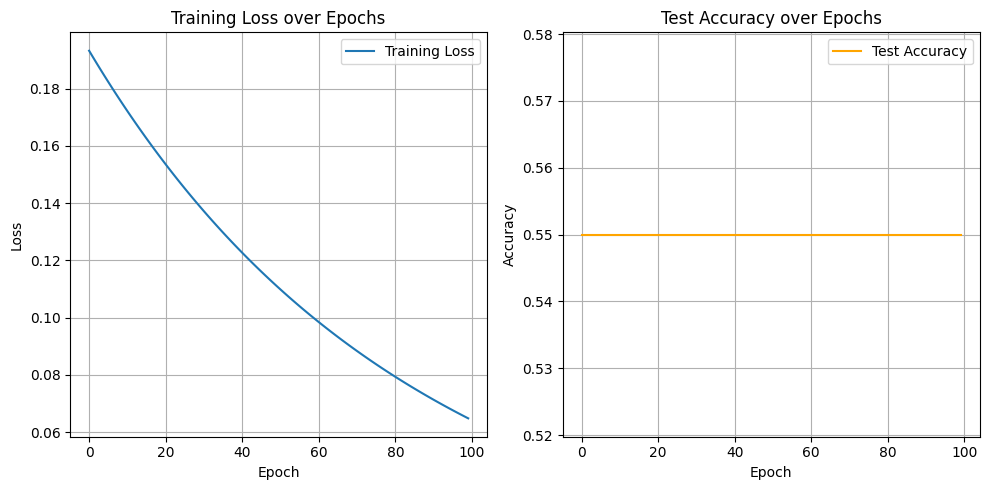

In [51]:
# prompt: plot learnign curves

import matplotlib.pyplot as plt

# Create lists to store loss and accuracy over epochs
train_losses = []
test_accuracies = []

# ... (rest of your code)

for epoch in range(100):
    model.train()
    rloss = 0.0
    for x, y, in tqdm(zip(X_train, y_train), total=len(X_train)):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        loss = criterion(p, y)
        loss.backward()
        optimizer.step()
        rloss += loss.item()

    avg_train_loss = rloss / len(X_train)
    train_losses.append(avg_train_loss)  # Store training loss

    print(f"epoch: {epoch}, loss: {avg_train_loss}")

    with torch.no_grad():
        model.eval()
        y_pred = model(X_test.to(device)).round()
        # print("\nTest Predictions:\n", y_pred.view(-1).tolist())
        accuracy = (y_pred == y_test.to(device)).float().mean().item()
        test_accuracies.append(accuracy)  # Store test accuracy
        print(f"accuracy: {accuracy}")

# Plotting the learning curves
epochs = range(100)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()